In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from patsy import dmatrix
from datetime import datetime

%matplotlib inline

In [54]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../csv/mlb_fa_list.csv')

print(df.shape)
df.tail()

(1200, 72)


,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Avg Salary($)
1195,Trevor Plouffe,2017,Athletics,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1196,Tyson Ross,2017,Rangers,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0,6000000.0
1197,Welington Castillo,2017,Orioles,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1198,Wilson Ramos,2017,Rays,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,2017,Mets,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [4]:
df.rename(columns={"wRC+": "wRC_Plus", "Contract Yrs" : "Contract_Yrs"}, inplace=True)
df.rename(columns={"BB%": "BB_Percent", "K%": "K_Percent", "K-BB%": "K_BB_Percent", "GB%": "GB_Percent",
                   "LOB%": "LOB_Percent"}, inplace=True)
df.rename(columns={"Avg Salary($)": "Salary", "Total Salary($)" : "Total_Salary"}, inplace=True)
df.rename(columns={"1B" : "Hits", "2B" : "Doubles", "3B" : "Triples"}, inplace=True)
df.rename(columns={"BB/K" : "BB_per_K", "HR/9" : "HR_per_9", "BB/9" : "BB_per_9", "K/9" : "K_per_9", "K/BB" : "K_per_BB",
                   "HR/FB" : "HR_per_FB"}, inplace=True)

df.tail()

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1195,Trevor Plouffe,2017,Athletics,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1196,Tyson Ross,2017,Rangers,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0,6000000.0
1197,Welington Castillo,2017,Orioles,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1198,Wilson Ramos,2017,Rays,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,2017,Mets,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [5]:
df.dtypes

Name             object
Yr                int64
Team             object
G                 int64
AB              float64
PA              float64
H_b             float64
Hits            float64
Doubles         float64
Triples         float64
HR_b            float64
R_b             float64
RBI             float64
BB_b            float64
IBB_b           float64
SO_b            float64
BB_Percent      float64
K_Percent       float64
BB_per_K        float64
BABIP_b         float64
HBP_b           float64
SF              float64
SH              float64
GDP             float64
SB              float64
CS              float64
Def             float64
ISO             float64
wOBA            float64
wRAA            float64
AVG             float64
OBP             float64
SLG             float64
OPS             float64
WAR             float64
wRC_Plus        float64
WPA             float64
W               float64
L               float64
GS              float64
CG              float64
IP              

In [6]:
## 각 변수별 기초통계량 확인

df.describe()

,Yr,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03
mean,2011.469167,75.087500,178.097500,199.583333,46.391667,30.773333,9.291667,0.773333,5.553333,22.927500,22.936667,17.063333,1.241667,35.730833,4.324250,10.040917,0.257933,0.153008,1.914167,1.509167,0.964167,4.212500,2.413333,0.961667,-0.715583,0.076445,0.164789,0.720417,0.132478,0.167763,0.208903,0.376678,0.944750,48.338333,0.072567,2.464167,2.472500,4.700833,0.115833,42.366083,42.372500,4.908333,14.151667,33.663333,21.016667,1.758333,0.706667,0.115833,19.377500,1.576667,2.545833,1.210000,0.046667,181.235833,1.430833,0.522058,1.608575,3.611217,1.277567,5.284250,21.555083,5.333583,35.744167,2.084342,0.145095,2.074100,0.670958,1.690000,1.339037e+07,4.928296e+06
std,3.417423,44.203429,205.199591,230.022416,55.977878,37.524664,11.700029,1.625574,8.548570,28.876642,29.511101,22.692476,2.871434,43.667025,4.763929,10.898781,0.306585,0.147992,3.212538,2.215251,2.151373,5.650571,6.336083,2.015419,6.007365,0.085505,0.160314,9.382646,0.128871,0.162577,0.207259,0.368059,1.448311,50.981792,1.425022,3.974739,3.788738,10.173048,0.575348,60.767485,62.057108,7.546460,20.157354,48.226806,30.875678,6.795961,1.563967,0.413391,28.478984,2.744765,5.688866,1.999808,0.279083,258.364995,2.434506,0.675729,1.884800,3.969940,1.664418,7.037507,22.818578,6.609057,36.894076,2.413092,0.150848,2.258178,0.711700,1.294332,2.956699e+07,5.042442e+06
min,2006.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.600000,0.000000,0.000000,-29.700000,0.000000,0.000000,0.000000,0.000000,-2.400000,-1.000000,-4.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.800000e+05,3.800000e+05
25%,2009.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,-1.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000e+06,1.500000e+06
50%,2011.000000,67.000000,87.500000,97.500000,21.000000,13.000000,3.000000,0.000000,0.000000,8.000000,7.000000,4.500000,0.000

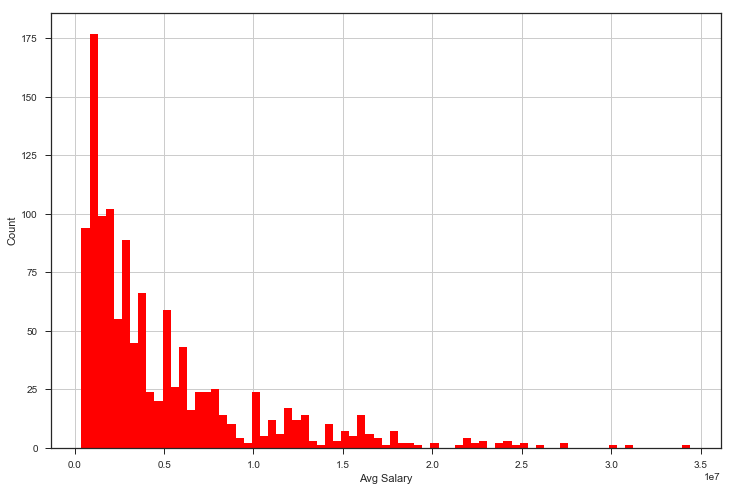

In [46]:
plt.figure(figsize=(12, 8))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

In [48]:
## FA 계약이 체결된 선수들에 대한 연도별 인원 파악

df.groupby('Yr').count()['Name']

Yr
0     111
1      81
2      98
3     107
4     116
5      96
6      76
7     115
8     113
9      98
10    105
11     84
Name: Name, dtype: int64

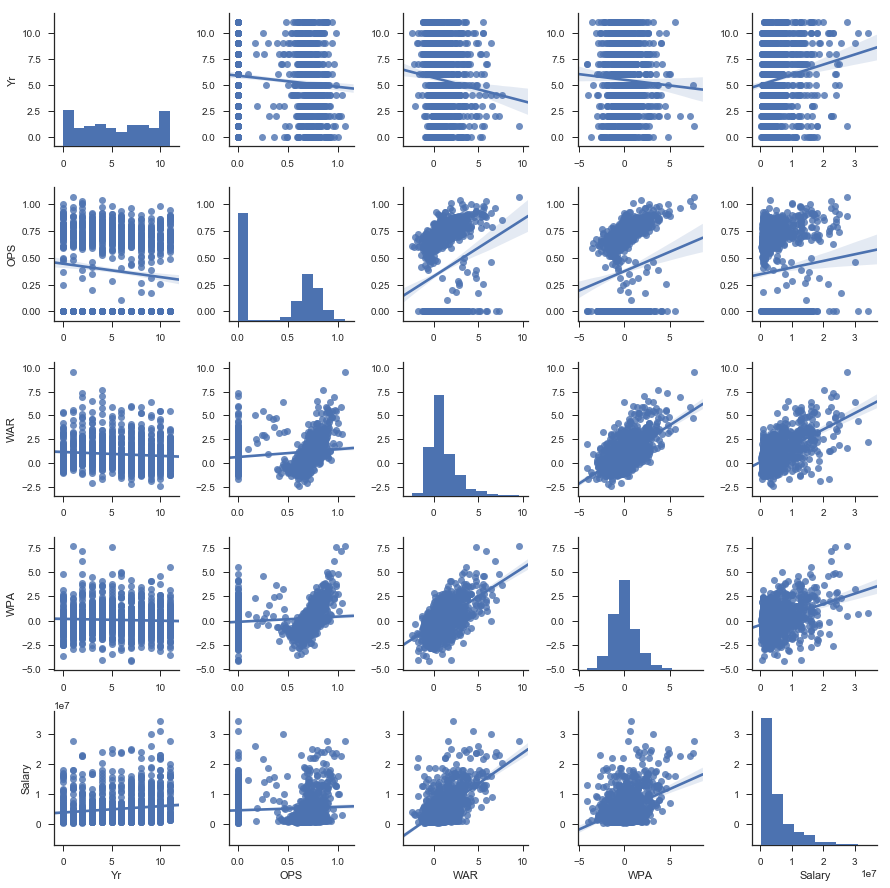

In [50]:
## 연봉(Salary)과 선수로서의 주요 지표들 간 관계를 pairplot을 통해 확인

cols = ["Yr", "OPS", "WAR", "WPA", "Salary"]
sns.set(style="ticks")
g = sns.pairplot(df[cols], kind="reg")

# cols = ["WAR", "wRC_Plus", "WPA", "Salary"]
# sns.pairplot(df[cols])
# plt.show()

In [9]:
## Encoding Two Categorical Columns

def encode_df_x1(df):
    
    ## categorical variables of Yr
    df_yr_le = LabelEncoder()
    df['Yr'] = df_yr_le.fit_transform(df['Yr'])
    
    enc_dict_yr = {'Yr' : df_yr_le}
    
    return df, enc_dict_yr
    
def encode_df_x2(df):
    
    ## categorical variables of Team
    df_team_le = LabelEncoder()
    df['Team'] = df_team_le.fit_transform(df['Team'])
    
    enc_dict_team = {'Team' : df_team_le}
    
    return df, enc_dict_team

train_df_x1 = encode_df_x1(df)
train_df_x2 = encode_df_x2(df)

In [10]:
df.tail(200)

,Name,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary,Salary
1000,Roberto Hernandez,9,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.3,0.0,-0.91,3.0,5.0,11.0,0.0,84.2,90.0,9.0,26.0,42.0,48.0,0.0,0.0,0.0,41.0,1.0,0.0,2.0,0.0,357.0,1.0,0.96,2.76,4.46,1.62,4.5,51.9,11.0,66.1,4.36,0.290,4.48,1.37,1.0,2600000.0,2.600000e+06
1001,Russell Martin,9,3,129,441.0,507.0,106.0,58.0,23.0,2.0,23.0,76.0,77.0,53.0,1.0,106.0,10.5,20.9,0.50,0.262,8.0,5.0,0.0,22.0,4.0,5.0,12.2,0.218,0.340,10.9,0.240,0.329,0.458,0.787,3.5,115.0,-0.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,5.0,82000000.0,1.640000e+07
1002,Ryan Vogelsong,9,10,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.1,0.0,-1.36,9.0,11.0,22.0,0.0,135.0,140.0,17.0,58.0,108.0,76.0,0.0,1.0,0.0,70.0,3.0,0.0,2.0,0.0,598.0,1.0,1.13,3.87,7.20,1.86,8.4,44.7,11.2,70.5,4.67,0.299,4.53,1.47,1.0,4000000.0,4.000000e+06
1003,Scott Baker,9,9,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.3,0.0,-0.37,0.0,1.0,2.0,0.0,11.0,11.0,4.0,3.0,8.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,45.0,1.0,3.27,2.45,6.55,2.67,11.1,38.2,25.0,83.3,5.73,0.233,7.23,1.27,1.0,1500000.0,1.500000e+06
1004,Sergio Romo,9,10,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,1.8,0.0,0.41,0.0,5.0,0.0,0.0,57.1,51.0,3.0,10.0,71.0,20.0,2.0,2.0,0.0,19.0,1.0,34.0,2.0,0.0,230.0,4.0,0.47,1.57,11.15,7.10,26.5,44.8,6.5,72.7,2.98,0.331,1.91,1.06,2.0,15000000.0,7.500000e+06
1005,Shaun Marcum,9,11,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-0.42,3.0,2.0,6.0,0.0,35.0,32.0,9.0,11.0,30.0,21.0,0.0,0.0,0.0,21.0,1.0,0.0,3.0,0.0,142.0,2.0,2.31,2.83,7.71,2.73,13.4,33.0,20.0,73.3,5.40,0.253,5.79,1.23,1.0,1000000.0,1.000000e+06
1006,Stephen Drew,9,29,131,383.0,428.0,77.0,43.0,16.0,1.0,17.0,43.0,44.0,37.0,1.0,71.0,8.6,16.6,0.52,0.201,1.0,3.0,4.0,7.0,0.0,2.0,1.5,0.180,0.284,-10.0,0.201,0.271,0.381,0.652,0.2,76.0,-2.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5000000.0,5.000000e+06
1007,Tim Stauffer,9,27,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.5,0.0,-0.64,1.0,0.0,0.0,0.0,20.2,32.0,6.0,9.0,14.0,18.0,0.0,1.0,0.0,16.0,1.0,1.0,2.0,0.0,100.0,2.0,2.61,3.92,6.10,1.56,5.0,53.3,28.6,71.4,6.97,0.371,7.01,1.98,1.0,2200000.0,2.200000e+06
1008,Tom Gorzelanny,9,26,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.1,0.0,0.23,2.0,2.0,0.0,0.0,39.1,45.0,4.0,23.0,36.0,28.0,0.0,0.0,0.0,26.0,2.0,2.0,2.0,0.0,181.0,1.0,0.92,5.26,8.24,1.57,7.2,39.3,8.5,65.2,5.95,0.353,4.53,1.73,1.0,1000000.0,1.000000e+06
1009,Torii Hunter,9,27,139,521.0,567.0,125.0,81.0,22.0,0.0,22.0,67.0,81.0,35.0,1.0,105.0,6.2,18.5,0.33,0.258,6.0,5.0,0.0,14.0,2.0,5.0,-6.5,0.169,0.304,-4.2,0.240,0.293,0.409,0.702,0.4,89.0,0.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,10500000.0,1.050000e+07


## * Splitting Dependent & Independent Variables

In [11]:
df_x = df.iloc[:, 1:71]

In [12]:
print(df_x.shape)
df_x.tail(10)

(1200, 70)


,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary
1190,11,4,54,132.0,153.0,22.0,15.0,2.0,0.0,5.0,18.0,8.0,16.0,1.0,57.0,10.5,37.3,0.28,0.243,4.0,0.0,1.0,3.0,1.0,0.0,-1.2,0.129,0.257,-8.2,0.167,0.276,0.295,0.572,-0.5,55.0,-0.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,11500000.0
1191,11,9,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.3,0.0,1.03,3.0,1.0,0.0,0.0,55.2,42.0,9.0,19.0,59.0,23.0,0.0,1.0,1.0,22.0,1.0,11.0,2.0,0.0,224.0,2.0,1.46,3.07,9.54,3.11,17.9,37.2,14.5,79.0,3.56,0.243,4.22,1.10,1.0,3000000.0
1192,11,15,46,95.0,106.0,24.0,16.0,7.0,0.0,1.0,9.0,17.0,8.0,0.0,21.0,7.5,19.8,0.38,0.303,0.0,3.0,0.0,2.0,0.0,0.0,1.3,0.105,0.285,-3.2,0.253,0.302,0.358,0.660,0.1,70.0,-0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,3500000.0
1193,11,25,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.6,0.0,-2.59,4.0,7.0,14.0,0.0,94.0,118.0,19.0,45.0,65.0,77.0,0.0,1.0,0.0,71.0,2.0,1.0,0.0,0.0,436.0,1.0,1.82,4.31,6.22,1.44,4.6,35.6,14.0,63.6,6.80,0.325,5.90,1.73,2.0,12000000.0
1194,11,17,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.3,0.0,-1.00,4.0,3.0,14.0,0.0,84.0,91.0,16.0,45.0,87.0,50.0,0.0,0.0,0.0,46.0,3.0,1.0,1.0,0.0,381.0,16.0,1.71,4.82,9.32,1.93,11.0,55.6,25.0,76.3,4.93,0.326,5.28,1.62,1.0,1750000.0
1195,11,2,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0
1196,11,20,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.80,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0
1197,11,16,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0
1198,11,21,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0
1199,11,14,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0


In [13]:
df_y = pd.DataFrame(df['Salary'])

print(df_y.shape)
df_y.tail(10)

(1200, 1)


,Salary
1190,5750000.0
1191,3000000.0
1192,3500000.0
1193,6000000.0
1194,1750000.0
1195,5250000.0
1196,6000000.0
1197,6500000.0
1198,6250000.0
1199,27500000.0


In [14]:
df_x_corr = df_x.corr()

df_x_corr

,Yr,Team,G,AB,PA,H_b,Hits,Doubles,Triples,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB_Percent,K_Percent,BB_per_K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC_Plus,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR_per_9,BB_per_9,K_per_9,K_per_BB,K_BB_Percent,GB_Percent,HR_per_FB,LOB_Percent,ERA,BABIP_p,FIP,WHIP,Contract_Yrs,Total_Salary
Yr,1.000000,0.012337,-0.114564,-0.106754,-0.108571,-0.129370,-0.135600,-0.129706,-0.100797,-0.055229,-0.121720,-0.120288,-0.096563,-0.118655,0.007816,-0.086073,0.040642,-0.205445,-0.098221,-0.092961,-0.105064,-0.162199,-0.098373,-0.095513,-0.109639,-0.054293,-0.079914,-0.117441,-0.045649,-0.127135,-0.119082,-0.112000,-0.115640,-0.094953,-0.101598,-0.045341,0.022023,0.040645,0.022249,-0.011120,0.028077,0.014996,0.042611,-0.003758,0.073486,0.012201,0.017491,0.015940,-0.030235,0.014341,-0.000237,0.020793,-0.078376,-0.003737,0.022581,0.065405,0.110800,0.047540,0.126794,0.139041,0.156941,0.090511,0.154158,0.079541,0.079960,0.084762,0.068129,0.067266,0.034417,0.077626
Team,0.012337,1.000000,-0.032983,-0.024461,-0.023932,-0.021785,-0.020907,-0.034864,-0.043389,0.005092,-0.025123,0.001193,-0.012533,-0.040928,-0.008941,-0.027840,-0.034070,-0.052083,-0.048325,-0.010782,-0.031700,-0.043861,-0.021448,-0.008615,-0.042563,-0.013088,-0.021557,-0.041867,0.034050,-0.048443,-0.045718,-0.039012,-0.042183,0.008884,-0.034917,-0.001990,0.004285,0.019000,-0.000010,0.027923,0.013418,0.022735,0.017608,0.004267,0.004632,0.022159,0.006870,0.017945,-0.021586,0.022852,0.009421,0.035204,-0.005512,0.032817,0.015153,-0.012904,0.045399,0.022008,0.019221,0.027994,0.010730,0.025041,0.033025,0.026340,0.058642,0.044343,0.043856,0.046963,0.016372,0.019417
G,-0.114564,-0.032983,1.000000,0.917138,0.917938,0.905151,0.884952,0.873412,0.525630,0.747201,0.887906,0.867480,0.826120,0.522458,0.821212,0.692233,0.541857,0.695060,0.741022,0.628858,0.736606,0.237784,0.797639,0.452070,0.530037,-0.241561,0.720745,0.775038,0.256414,0.769572,0.769873,0.775809,0.776934,0.266597,0.781038,0.210080,-0.506182,-0.542087,-0.478514,-0.200737,-0.567736,-0.571770,-0.561417,-0.564044,-0.544745,-0.580368,-0.078359,-0.153989,-0.207313,-0.580035,-0.468375,-0.141466,-0.387538,-0.169484,-0.573889,-0.461202,-0.670673,-0.673606,-0.662994,-0.551803,-0.506227,-0.723337,-0.678599,-0.735297,-0.734648,-0.755231,-0.761818,-0.761742,0.224135,0.188481
AB,-0.106754,-0.024461,0.917138,1.000000,0.998818,0.989115,0.971109,0.953241,0.575670,0.800053,0.965902,0.934519,0.878569,0.552883,0.881491,0.750359,0.620947,0.764018,0.834218,0.674185,0.799261,0.293946,0.871244,0.510647,0.589556,-0.221534,0.792018,0.863400,0.268796,0.862999,0.857672,0.863273,0.864977,0.305249,0.859165,0.159656,-0.519829,-0.551033,-0.383482,-0.160930,-0.586594,-0.574830,-0.548975,-0.593207,-0.588415,-0.574422,-0.224747,-0.392492,-0.235424,-0.574143,-0.486213,-0.388730,-0.515946,-0.132842,-0.590594,-0.496875,-0.663293,-0.733562,-0.780708,-0.657026,-0.643482,-0.809253,-0.692438,-0.830346,-0.741595,-0.824738,-0.788015,-0.808909,0.244450,0.232912
PA,-0.108571,-0.023932,0.917938,0.998818,1.000000,0.987223,0.966258,0.952864,0.573360,0.809907,0.970869,0.938984,0.899689,0.567259,0.889497,0.770127,0.626253,0.776656,0.833986,0.684834,0.800815,0.292663,0.867031,0.507514,0.585001,-0.231225,0.798759,0.866258,0.290644,0.861800,0.861398,0.865311,0.867771,0.317006,0.865252,0.175285,-0.519001,-0.550488,-0.382806,-0.160349,-0.585823,-0.574124,-0.548510,-0.592549,-0.587645,-0.573806,-0.224681,-0.392377,-0.235248,-0.573535,-0.485662,-0.388616,-0.515610,-0.132203,-0.589843,-0.496305,-0.662951,-0.733120,-0.780160,-0.656506,-0.642971,-0.808615,-0.692019,-0.829745,-0.741152,-0.824156,-0.787531,-0.808378,0.249128,0.239794
H_b,-0.129370,-0.021785,0.905151,0.989115,0.987223,1.000000,0.985721,0.963164,0.594765,0.789975,0.970156,0.936075,0.861904,0.575506,0.835716,0.712885,0.557113,0.763230,0.816442,0.667415,0.796133,0.279192,0.870226,0.524721,0.597864,-0.225135,0.770641,0.844454,0.354243,0.85

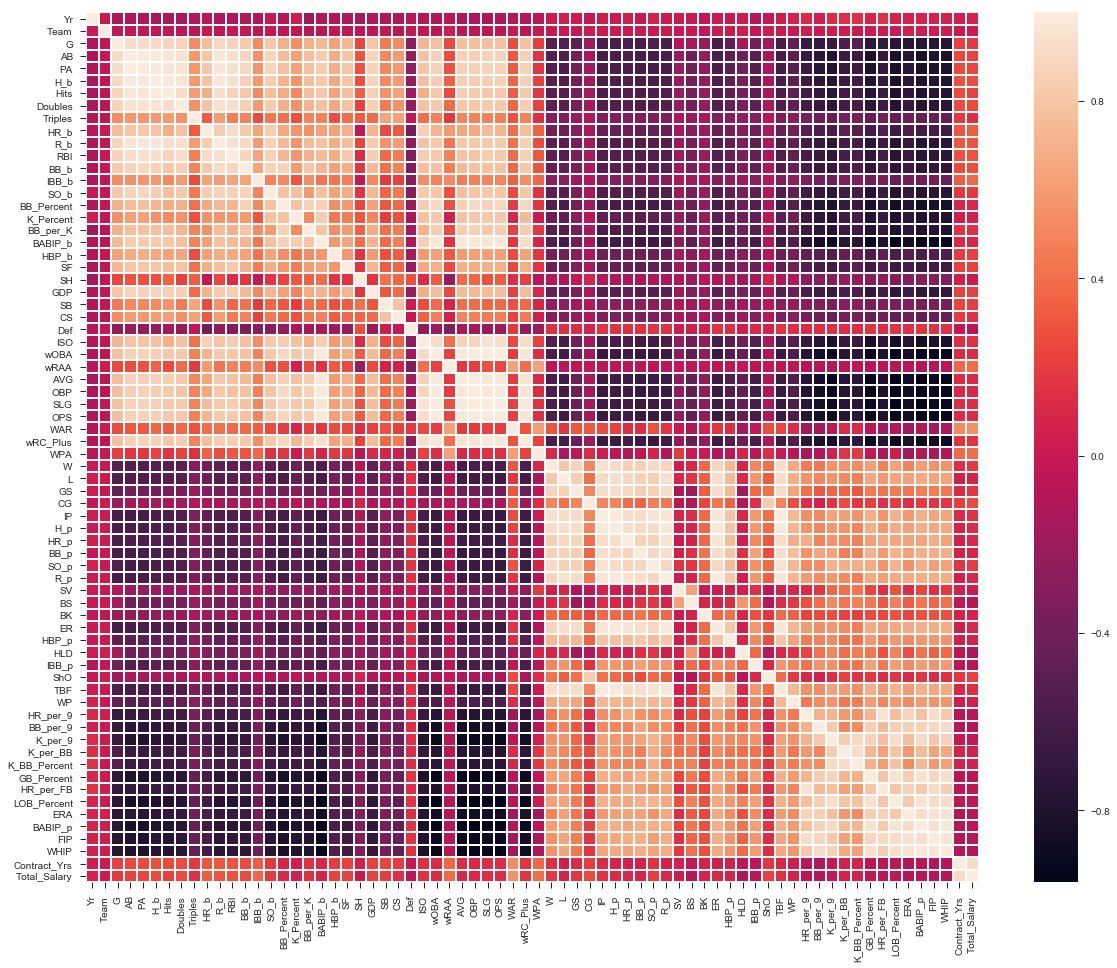

In [15]:
plt.figure(figsize=(20, 16))
corr_data = pd.DataFrame.corr(df_x)
sns.heatmap(corr_data, annot=False, linewidths=1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


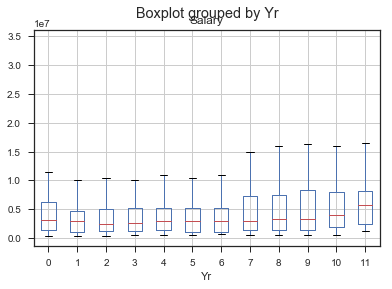

In [16]:
plt.figure(figsize=(16, 12))
df.boxplot("Salary", "Yr")
plt.show()

In [17]:
dfX_mlb = sm.add_constant(df_x)
dfy_mlb = pd.DataFrame(df_y, columns=["Salary"])
df_mlb = pd.concat([dfX_mlb, dfy_mlb], axis=1)

In [18]:
model = sm.OLS(dfy_mlb, dfX_mlb)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     85.13
Date:                Fri, 29 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:28:44   Log-Likelihood:                -19128.
No. Observations:                1200   AIC:                         3.840e+04
Df Residuals:                    1130   BIC:                         3.875e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.647e+06   9.92e+05     -1.659   

In [19]:
print(df_x.columns.tolist())
len(df_x.columns.tolist())

['Yr', 'Team', 'G', 'AB', 'PA', 'H_b', 'Hits', 'Doubles', 'Triples', 'HR_b', 'R_b', 'RBI', 'BB_b', 'IBB_b', 'SO_b', 'BB_Percent', 'K_Percent', 'BB_per_K', 'BABIP_b', 'HBP_b', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA', 'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC_Plus', 'WPA', 'W', 'L', 'GS', 'CG', 'IP', 'H_p', 'HR_p', 'BB_p', 'SO_p', 'R_p', 'SV', 'BS', 'BK', 'ER', 'HBP_p', 'HLD', 'IBB_p', 'ShO', 'TBF', 'WP', 'HR_per_9', 'BB_per_9', 'K_per_9', 'K_per_BB', 'K_BB_Percent', 'GB_Percent', 'HR_per_FB', 'LOB_Percent', 'ERA', 'BABIP_p', 'FIP', 'WHIP', 'Contract_Yrs', 'Total_Salary']


70

In [20]:
cols = df_x.columns.tolist()

cat_cols = cols[:2]
num_cols = cols[2:70]

cat_cols_list = []
num_cols_list = []

def r_style_cat_cols(convert1, convert2):
    for item1 in cat_cols:
        cat_cols_list.append("C(" + item1 + ")")
        
    for item2 in num_cols:
        num_cols_list.append("scale(" + item2 + ")")
        
    return cat_cols_list, num_cols_list

converted_cols = r_style_cat_cols(cat_cols, num_cols)

converted_cols_list = " + ".join(cat_cols_list + num_cols_list)
model_str = "Salary ~ "

ols_str_list = model_str + converted_cols_list

# print(ols_str_list)
# print(converted_cols_list)

In [21]:
dfX = dmatrix(converted_cols_list, data=df_x)
dfX_columns = dfX.design_info.column_names
dfX = pd.DataFrame(dfX, columns=dfX_columns)

dfY = pd.DataFrame(df_y)

In [28]:
model2 = sm.OLS(dfY, dfX)
result2 = model.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     85.13
Date:                Fri, 29 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:34:20   Log-Likelihood:                -19128.
No. Observations:                1200   AIC:                         3.840e+04
Df Residuals:                    1130   BIC:                         3.875e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.647e+06   9.92e+05     -1.659   

In [27]:
model2 = sm.OLS.from_formula(ols_str_list, df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     58.35
Date:                Fri, 29 Dec 2017   Prob (F-statistic):               0.00
Time:                        15:33:39   Log-Likelihood:                -19079.
No. Observations:                1200   AIC:                         3.837e+04
Df Residuals:                    1092   BIC:                         3.892e+04
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.304e+06   4

In [ ]:
dfX_mlb2 = sm.add_constant(converted_cols_list)
dfy_mlb2 = pd.DataFrame(df_y, columns=["Salary"])
df_mlb2 = pd.concat([dfX_mlb2, dfy_mlb2], axis=1)

In [ ]:
model2 = sm.OLS.from_formula(df_y, converted_cols_list, data=df)
result2 = model2.fit()

print(sm.stats.anova_lm(result2), '\n\n\n\n\n')
print(result2.summary())

In [ ]:
cols = ['Yr', 'Team', 'G', 'AB', 'PA', 'H_b', '1B', '2B', '3B', 'HR_b', 'R_b', 'RBI', 'BB_b', 'IBB_b', 'SO_b', 'BB%', 'K%']

sns.pairplot(df[cols])
plt.show()

%time

In [ ]:
cols2 = ['BB/K', 'BABIP_b', 'HBP_b', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA', 'wRAA', 'AVG', 'OBP', 'SLG', 'OPS']

sns.pairplot(df[cols2])
plt.show()

%time

In [ ]:
cols3 = ['WAR', 'wRC+', 'WPA', 'W', 'L', 'GS', 'CG', 'IP', 'H_p', 'HR_p', 'BB_p', 'SO_p', 'R_p', 'SV', 'BS', 'BK', 'ER']

sns.pairplot(df[cols3])
plt.show()

%time

In [ ]:
cols4 = ['HBP_p','HLD', 'IBB_p', 'ShO', 'TBF', 'WP', 'HR/9', 'BB/9', 'K/9', 'K/BB', 'K-BB%', 'GB%', 'HR/FB', 'LOB%', 'ERA']

sns.pairplot(df[cols4])
plt.show()

%time

In [ ]:
cols5 = ['BABIP_p', 'FIP', 'WHIP', 'Contract Yrs', 'Total Salary($)']

sns.pairplot(df[cols5])
plt.show()

%time

In [ ]:
model2 = sm.OLS.from_formula("Salary ~ C(month)", df)
result2 = model2.fit()
print(result.summary())